## Loading sakila data

In [1]:
import duckdb
from pathlib import Path

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())


In [2]:
conn = duckdb.connect(duckdb_path)

## Which movies is longer than 180 minutes

In [3]:

films_df = conn.sql("""
SELECT
    title,
    length
FROM
    film
WHERE length >= 180; 
""").df()

films_df.head(5)

,title,length
0,ALLEY EVOLUTION,180
1,ANALYZE HOOSIERS,181
2,BAKED CLEOPATRA,182
3,CATCH AMISTAD,183
4,CHICAGO NORTH,185


In [4]:
len(films_df)

46

## There is 46 movies thar are loonger or equal to 180 minutes

## Movies that contains "love" in it's title

In [5]:
conn.sql("DESC film").df()

,column_name,column_type,null,key,default,extra
0,film_id,BIGINT,YES,None,None,None
1,title,VARCHAR,YES,None,None,None
2,description,VARCHAR,YES,None,None,None
3,release_year,VARCHAR,YES,None,None,None
4,language_id,BIGINT,YES,None,None,None
5,original_language_id,BIGINT,YES,None,None,None
6,rental_duration,BIGINT,YES,None,None,None
7,rental_rate,DOUBLE,YES,None,None,None
8,length,BIGINT,YES,None,None,None
9,replacement_cost,DOUBLE,YES,None,None,None


In [6]:
love_titles = conn.sql("""
SELECT
    title,
    rating,
    length,
    description
FROM
    film
WHERE title LIKE '%LOVE%';
""").df()

love_titles

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [7]:
len(love_titles)

10

## There is 10 titles that includes "love"

## Calculate shortest, median, average and longest movie length

In [8]:
calculation_length = conn.sql("""
SELECT
    length
FROM
    film
""").df()

calculation_length.head(3)

,length
0,86
1,48
2,50


## Shortest movie length, 46 minutes

In [9]:
calculation_length.min()

length    46
dtype: int64

## Longest movie length, 185 minutes

In [10]:
calculation_length.max()

length    185
dtype: int64

## Average movie length, 115,3 minutes

In [11]:
calculation_length.mean()

length    115.272
dtype: float64

## Median movie length, 114 minutes

In [12]:
calculation_length.median()

length    114.0
dtype: float64

## Top 10 most expensive movies to rent

Checking what columns to use fro this query

In [15]:
conn.sql("DESCRIBE film;").df()[["column_name"]]


,column_name
0,film_id
1,title
2,description
3,release_year
4,language_id
5,original_language_id
6,rental_duration
7,rental_rate
8,length
9,replacement_cost


Checking the data

In [18]:
rent_movie_cost = conn.sql("""
SELECT
    title,
    rental_duration,
    rental_rate
FROM film
""").df()

rent_movie_cost.sample(5)

,title,rental_duration,rental_rate
681,PITTSBURGH HUNCHBACK,4,4.99
616,NATURAL STOCK,4,0.99
997,ZHIVAGO CORE,6,0.99
482,JERICHO MULAN,3,2.99
56,BASIC EASY,4,2.99


The query to get the most expensive movies to rent

In [22]:
rent_movie_cost = conn.sql("""
SELECT
    title,
    rental_duration,
    rental_rate,
    rental_rate / rental_duration AS cost_per_day
FROM film
ORDER BY cost_per_day desc
LIMIT 10;                           
""").df()

rent_movie_cost

,title,rental_duration,rental_rate,cost_per_day
0,AMERICAN CIRCUS,3,4.99,1.663333
1,BACKLASH UNDEFEATED,3,4.99,1.663333
2,BILKO ANONYMOUS,3,4.99,1.663333
3,BEAST HUNCHBACK,3,4.99,1.663333
4,CARIBBEAN LIBERTY,3,4.99,1.663333
5,AUTUMN CROW,3,4.99,1.663333
6,CASPER DRAGONFLY,3,4.99,1.663333
7,ACE GOLDFINGER,3,4.99,1.663333
8,BEHAVIOR RUNAWAY,3,4.99,1.663333
9,CASUALTIES ENCINO,3,4.99,1.663333


## Actors with most movie appearances

Check columns in "film_actor"

In [48]:
conn.sql("SELECT * FROM film_actor;").df()

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45
...,...,...,...
5457,200,879,2021-03-06 15:53:28
5458,200,912,2021-03-06 15:53:28
5459,200,945,2021-03-06 15:53:28
5460,200,958,2021-03-06 15:53:28


Check columns in "actor"


In [49]:
conn.sql("SELECT * FROM actor;").df()



,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59
2,3.0,ED,CHASE,2021-03-06 15:51:59
3,4.0,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5.0,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196.0,BELA,WALKEN,2021-03-06 15:52:00
196,197.0,REESE,WEST,2021-03-06 15:52:00
197,198.0,MARY,KEITEL,2021-03-06 15:52:00
198,199.0,JULIA,FAWCETT,2021-03-06 15:52:00


Left join to see who got most appearances

In [59]:
top_actors = conn.sql("""
SELECT
    COUNT(*) AS movie_count,
    a.first_name,
    a.last_name
FROM actor a
LEFT JOIN film_actor fa
    ON a.actor_id = fa.actor_id
GROUP BY
    a.first_name,
    a.last_name
ORDER BY
    movie_count DESC
LIMIT 10;
""").df()

top_actors


,movie_count,first_name,last_name
0,54,SUSAN,DAVIS
1,42,GINA,DEGENERES
2,41,WALTER,TORN
3,40,MARY,KEITEL
4,39,MATTHEW,CARREY
5,37,SANDRA,KILMER
6,36,SCARLETT,DAMON
7,35,ANGELA,WITHERSPOON
8,35,HENRY,BERRY
9,35,VAL,BOLGER


In [50]:
conn.sql("SELECT * FROM staff;").df()


,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,<NA>,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,<NA>,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


In [51]:
conn.sql("SELECT * FROM payment;").df()


,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76,2.99,2005-05-25 11:30:37,2021-03-06 15:55:57
1,2,1,1,573,0.99,2005-05-28 10:35:23,2021-03-06 15:55:57
2,3,1,1,1185,5.99,2005-06-15 00:54:12,2021-03-06 15:55:57
3,4,1,2,1422,0.99,2005-06-15 18:02:53,2021-03-06 15:55:57
4,5,1,2,1476,9.99,2005-06-15 21:08:46,2021-03-06 15:55:57
...,...,...,...,...,...,...,...
16044,16045,599,1,14599,4.99,2005-08-21 17:43:42,2021-03-06 15:58:08
16045,16046,599,1,14719,1.99,2005-08-21 21:41:57,2021-03-06 15:58:08
16046,16047,599,2,15590,8.99,2005-08-23 06:09:44,2021-03-06 15:58:09
16047,16048,599,2,15719,2.99,2005-08-23 11:08:46,2021-03-06 15:58:09


## Number of payments handled by the staff

In [62]:
staff_payments = conn.sql("""
SELECT
    s.first_name,
    s.last_name,
    COUNT(p.payment_id) AS payments
FROM staff s
LEFT JOIN payment p
    ON s.staff_id = p.staff_id
GROUP BY s.first_name,
         s.last_name;
""").df()

staff_payments

,first_name,last_name,payments
0,Jon,Stephens,7992
1,Mike,Hillyer,8057


## Query to look after how many cities in each country iun this dataset

In [ ]:
cities_per_country = conn.sql("""
SELECT
    co.country,
    COUNT(*) AS num_cities
FROM city c
JOIN country co
    ON c.country_id = co.country_id
GROUP BY co.country
ORDER BY num_cities DESC;
""").df()

cities_per_country

# In this i used a litte bit of help by llm


,country,num_cities
0,India,60
1,China,53
2,United States,35
3,Japan,31
4,Mexico,30
...,...,...
104,Madagascar,1
105,Malawi,1
106,Saint Vincent and the Grenadines,1
107,Runion,1


## Which is the top customer based on most rented movies

In [98]:
conn.sql("SELECT * FROM customer;").df().columns

Index(['customer_id', 'store_id', 'first_name', 'last_name', 'email',
       'address_id', 'active', 'create_date', 'last_update'],
      dtype='object')

In [97]:
conn.sql("SELECT * FROM rental;").df().columns


Index(['rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'last_update'],
      dtype='object')

In [89]:
top_customer = conn.sql("""
SELECT
    c.first_name,
    c.last_name,
    COUNT(r.rental_id) AS num_rentals
FROM customer c
JOIN rental r
    ON c.customer_id = r.customer_id
GROUP BY
    c.first_name,
    c.last_name
ORDER BY
    num_rentals DESC
LIMIT 1;
""").df()

top_customer



,first_name,last_name,num_rentals
0,ELEANOR,HUNT,46


## Top 5 customers

This query takes out the 5 people with the most spending

In [112]:
top_5_customers = conn.sql("""
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    SUM(p.amount) AS spending_total
FROM customer c
LEFT JOIN payment p
    ON c.customer_id = p.customer_id
GROUP BY
    c.customer_id,
    c.first_name,
    c.last_name
ORDER BY spending_total DESC
LIMIT 5;
""").df()

top_5_customers


,customer_id,first_name,last_name,spending_total
0,526,KARL,SEAL,221.55
1,148,ELEANOR,HUNT,216.54
2,144,CLARA,SHAW,195.58
3,178,MARION,SNYDER,194.61
4,137,RHONDA,KENNEDY,194.61


In [120]:
top_5_customers["customer_name"] = (
    top_5_customers["first_name"] + " " + top_5_customers["last_name"]
)

## This code has been made by an llm


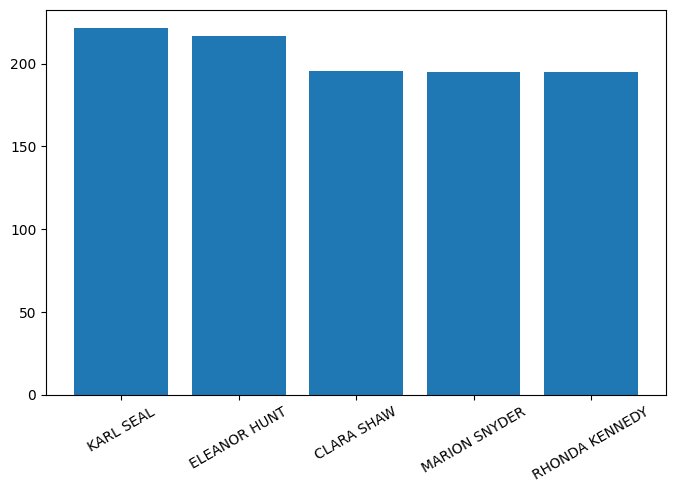

In [122]:
plt.figure(figsize=(8, 5))
plt.bar(
    top_5_customers["customer_name"],
    top_5_customers["spending_total"]
)

plt.xticks(rotation=30)
plt.show()

## This code has been made by an llm
